In [3]:
# Cell 1: Imports and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

data_path1='../data/processed/train.csv'
data_path2='../data/processed/test.csv'

# Load both datasets
df1 = pd.read_csv(data_path1)
df2 = pd.read_csv(data_path2)

# Combine them (row-wise)
df = pd.concat([df1, df2], ignore_index=True)

# Preview
df.head()


,id,title,selftext,label,clean_text
0,1limkkz,I just wanna die,im 16 and I feel like the only option left for...,depression,want die feel like option left dying along sev...
1,m3au2k,Reality worse than any nightmare imaginable,I don’t know what to do or who to talk to. Whe...,suicidal,reality worse nightmare imaginable know talk e...
2,1jaccuf,I'm so fucking done,"About 2-3 months ago I was feeling suicidal, a...",suicidal,fucking done month ago feeling suicidal instea...
3,wvp42e,"27M, just found out I have low testosterone le...",This explains so much about who I am. I'm hone...,suicidal,found low testosterone level probably always f...
4,0234a895,thoughts on loli hentai lmao loli hentai,kinda claps doe &amp;#x200B; idk if i need a f...,normal,thought loli hentai lmao loli hentai kind clap...


In [4]:
# Cell 2: Dataset Overview
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Basic info
df.info()


Shape of dataset: (44775, 5)

Data types:
 id            object
title         object
selftext      object
label         object
clean_text    object
dtype: object

Missing values:
 id            0
title         0
selftext      0
label         0
clean_text    3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44775 entries, 0 to 44774
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          44775 non-null  object
 1   title       44775 non-null  object
 2   selftext    44775 non-null  object
 3   label       44775 non-null  object
 4   clean_text  44772 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


label
suicidal      11379
anxiety       11327
depression    11057
normal        11012
Name: count, dtype: int64


C:\Users\kengu\AppData\Local\Temp\ipykernel_2556\2138587187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")


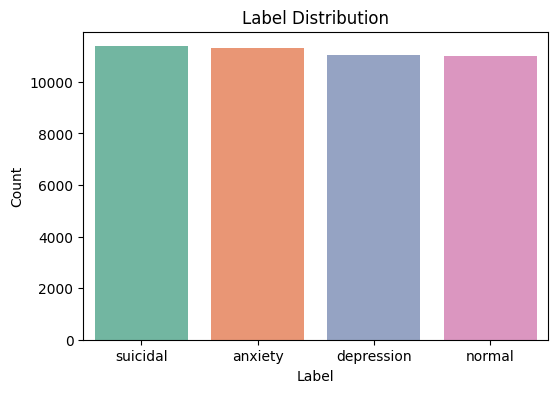

In [5]:
# Cell 3: Label distribution
label_counts = df['label'].value_counts()
print(label_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Label Distribution")
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()



Clean text length stats:
 count    44775.000000
mean       130.448554
std        178.375402
min          1.000000
25%         31.000000
50%         75.000000
75%        161.000000
max       3413.000000
Name: clean_text_len, dtype: float64


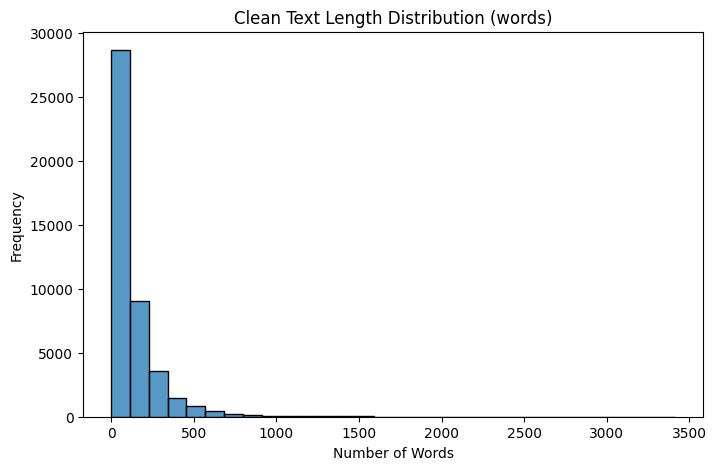

In [7]:
# Cell 4: Text length analysis
# Compute lengths (in words)
df['clean_text_len'] = df['clean_text'].astype(str).apply(lambda x: len(x.split()))

print("\nClean text length stats:\n", df['clean_text_len'].describe())

# Histograms
plt.figure(figsize=(8,5))
sns.histplot(df["clean_text_len"], bins=30, kde=False)
plt.title("Clean Text Length Distribution (words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Cell 5: Missing / empty texts
empty_clean_text = df['clean_text'].isnull().sum() + (df['clean_text'].astype(str).str.strip() == "").sum()

print(f"Empty selftexts: {empty_clean_text}")

# Check for "removed" or "deleted" content in selftext
removed_count = df['clean_text'].str.lower().isin(['[removed]', '[deleted]']).sum()
print(f"Removed/Deleted selftexts: {removed_count}")


Empty selftexts: 3
Removed/Deleted selftexts: 0


In [11]:
# Cell 6: Common words per class (Unigrams)
from collections import Counter
import re

def get_top_words(texts, n=20):
    words = []
    for txt in texts:
        txt = str(txt).lower()
        txt = re.sub(r"[^a-z\s]", "", txt)  # keep only letters
        words.extend(txt.split())
    return Counter(words).most_common(n)

for label in df['label'].unique():
    print(f"\nTop words for {label}:")
    top_words = get_top_words(df[df['label'] == label]['clean_text'])
    print(top_words)



Top words for depression:
[('like', 27178), ('feel', 25554), ('know', 17919), ('would', 17884), ('time', 17376), ('get', 16116), ('want', 15569), ('even', 13768), ('life', 13711), ('year', 13317), ('thing', 12583), ('friend', 12040), ('really', 11982), ('one', 11773), ('day', 11256), ('people', 10523), ('never', 9694), ('could', 9438), ('going', 9219), ('make', 8757)]

Top words for suicidal:
[('like', 25258), ('want', 22484), ('feel', 21796), ('would', 18319), ('know', 17889), ('life', 16498), ('time', 15692), ('get', 14969), ('even', 13868), ('year', 12902), ('one', 11646), ('friend', 11459), ('thing', 11262), ('people', 10928), ('day', 10917), ('really', 10742), ('going', 9807), ('never', 9707), ('think', 9334), ('could', 9118)]

Top words for normal:
[('like', 5577), ('would', 3491), ('know', 3086), ('mom', 2974), ('day', 2708), ('get', 2610), ('want', 2544), ('one', 2437), ('time', 2413), ('people', 2289), ('filler', 2003), ('really', 1890), ('make', 1854), ('going', 1621), ('yea

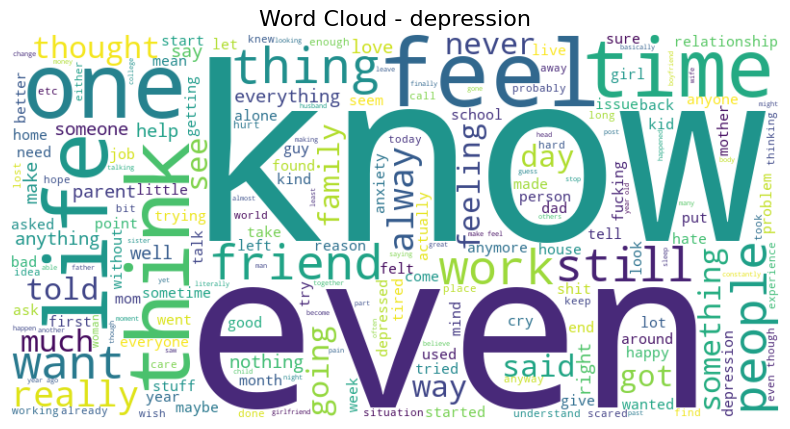

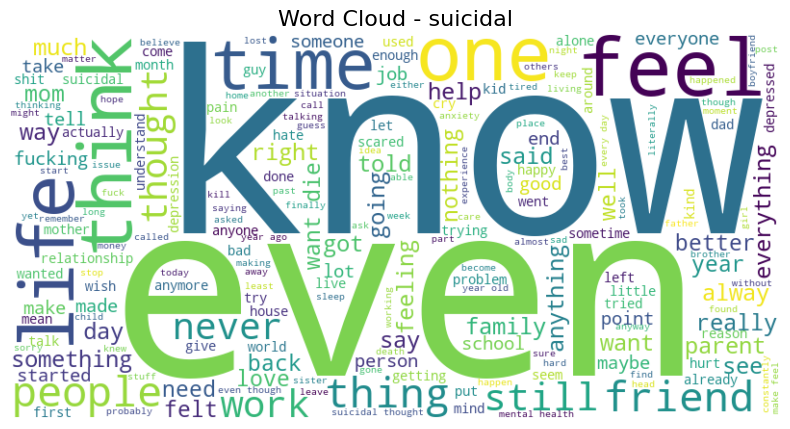

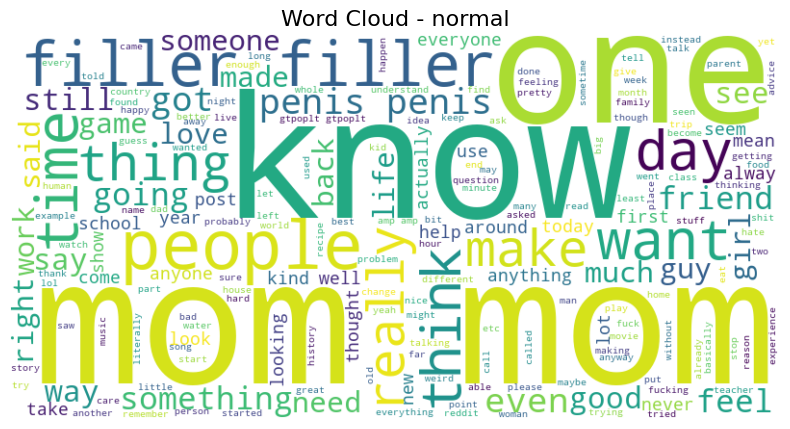

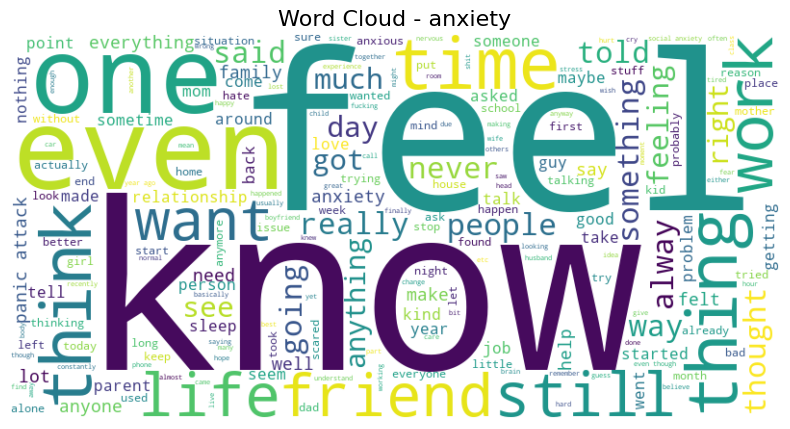

In [9]:
# Cell 7: Word clouds
from wordcloud import WordCloud

for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_text'].dropna().astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label}", fontsize=16)
    plt.show()


C:\Users\kengu\AppData\Local\Temp\ipykernel_2556\2687736739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='clean_text_len', data=df, palette="Set3")


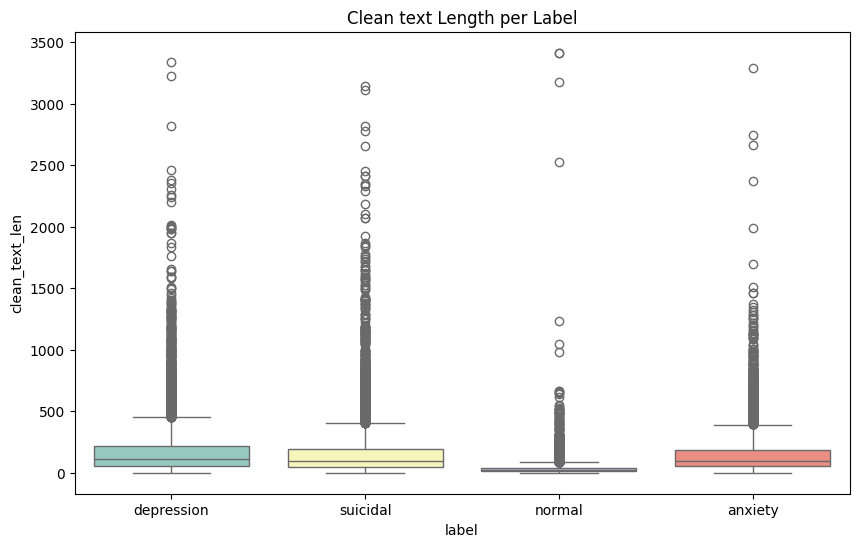

In [10]:
# Cell 8: Label vs Text Length
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='clean_text_len', data=df, palette="Set3")
plt.title("Clean text Length per Label")
plt.show()
